# 1. Import and Install Dependencies

In [1]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.0.0
anaconda-client               1.9.0
anaconda-navigator            2.1.1
argon2-cffi                   20.1.0
astunparse                    1.6.3
async-generator               1.10
attrs                         21.2.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.10.0
bleach                        4.0.0
Brotli                        1.0.9
brotlipy                      0.7.0
bs4                           0.0.1
certifi                       2021.10.8
cffi                          1.15.0
chardet                       4.0.0
charset-normalizer            2.0.4
click                         8.0.3
cloudpickle                   2.0.0
clyent                        1.2.2
colorama                      0.4.4
c

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic=mp.solutions.holistic #Holistic Model
mp_drawing=mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #Color COnversion
    image.flags.writeable=False #Image is no Longer Writeable
    results=model.process(image) #make Predictions
    image.flags.writeable=True #Image is now Writeable
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #Back to orginal Color
    return image,results

In [4]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION) #DRAW FACE CONNECTIONS
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)#DRAW BODY CONNECTIONS
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)#LEFT HAND CORRECTION
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)#RIGHT HAND CORRECTIONS

In [5]:
def draw_styled_landmarks(image,results):
    #Draw Face Connections
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
                             )
    #Draw POSE Connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                         mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),
                         mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)
                         )
    #Draw Left Hand Connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                         mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),
                         mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2)
                         )
    #Draw Right Hand Connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                         mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),
                         mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2)
                         )

In [39]:
mp_drawing.draw_landmarks??

In [61]:
cap=cv2.VideoCapture(0)
# Set Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #Read FEED
        ret,frame=cap.read()
        #Make Detections
        image,results=mediapipe_detection(frame,holistic)
        #print(results)
        #Draw Landmarks
        draw_styled_landmarks(image,results)
        #Show To Screen
        cv2.imshow('OpenCV Feed',image)
        #Break
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [17]:
len(results.left_hand_landmarks.landmark)

21

In [34]:
draw_landmarks(frame,results)

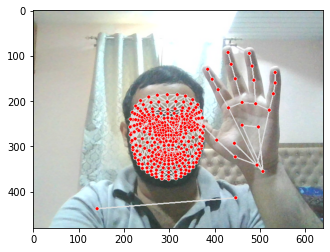

In [36]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [44]:
results.pose_landmarks.landmark[0]

x: 0.4805878698825836
y: 0.5882425904273987
z: -1.2490359544754028
visibility: 0.9995944499969482

In [46]:
test

array([ 4.54037130e-01,  3.11541581e+00, -3.58700752e-01,  2.33316299e-04])

In [47]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [48]:
len(pose)

33

In [64]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [75]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [78]:
len( pose),len(face),len(lh),len(rh)

(132, 1404, 63, 63)

In [68]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
pose

array([ 4.80587870e-01,  5.88242590e-01, -1.24903595e+00,  9.99594450e-01,
        5.09344459e-01,  5.22162676e-01, -1.18469763e+00,  9.99159038e-01,
        5.25388360e-01,  5.22907913e-01, -1.18509734e+00,  9.99251068e-01,
        5.42416096e-01,  5.24783194e-01, -1.18546462e+00,  9.99007881e-01,
        4.48551595e-01,  5.23625970e-01, -1.18799615e+00,  9.99272287e-01,
        4.25088495e-01,  5.26014447e-01, -1.18754351e+00,  9.99410748e-01,
        4.06166553e-01,  5.29082000e-01, -1.18803525e+00,  9.99371171e-01,
        5.68053365e-01,  5.53618371e-01, -7.13916540e-01,  9.99165714e-01,
        3.81921947e-01,  5.55247426e-01, -7.12187052e-01,  9.99648929e-01,
        5.13715506e-01,  6.59990132e-01, -1.06578422e+00,  9.99612153e-01,
        4.40318763e-01,  6.64056897e-01, -1.06604743e+00,  9.99773383e-01,
        7.28539228e-01,  8.75254691e-01, -3.83976161e-01,  9.97134686e-01,
        2.31080860e-01,  8.84061933e-01, -3.97341043e-01,  9.97523010e-01,
        8.82534981e-01,  

In [58]:
pose.shape

(132,)

In [6]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [85]:
extract_keypoints(results).shape

(1662,)

# 4. Setup Folders For Collection

In [10]:
#Path for Exported DATA numpy arrays
DATA_PATH=os.path.join('MediaPipe_DATA')

#Actions thae we Trhy to Detect
actions=np.array(['hello','thanks','iloveyou'])

#  30 Videos worth of data
no_sequences=30

# Each Videos are going to be 30 frames in Length
sequence_length=30

In [9]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [11]:
cap=cv2.VideoCapture(0)
# Set Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    #Loop through actions
    for action in actions:
        
        #Loop through sequences aka videos
        for sequence in range(no_sequences):
            
            #Loop through video length aka sequence length:
            for frame_num in range(sequence_length):
                #Read FEED
                ret,frame=cap.read()
                
                #Make Detections
                image,results=mediapipe_detection(frame,holistic)
                #print(results)
                
                #Draw Landmarks
                draw_styled_landmarks(image,results)
                
                #Apply Collenction LOgic (Waiting Time )
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    
                # New Export Keypoints
                                
                keypoints=extract_keypoints(results)
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
               # #Show To Screen
               # cv2.imshow('OpenCV Feed',image)
                #Break
                if cv2.waitKey(10) & 0xFF==ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

In [10]:
cv2.putText??

# 6. Preprocess Data and Create Labels and Features

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
labelmap={label:num for num,label in enumerate(actions)}

In [ ]:
labelmap

In [18]:
print(enumerate(actions))

In [22]:
sequences,labels=[],[]
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(labelmap[action])

In [23]:
np.array(sequences).shape

(90, 30, 1662)

In [24]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [26]:
np.array(labels).shape

(90,)

In [29]:
X=np.array(sequences)

In [30]:
X.shape

(90, 30, 1662)

In [31]:
y=to_categorical(labels).astype(int)

In [32]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05)

In [34]:
y_test.shape

(5, 3)

#  7.Build and Train LSTM Neural Network

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [8]:
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [11]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [37]:
res=[.7,0.2,0.1]

In [38]:
actions[np.argmax(res)]

'hello'

In [12]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [40]:
model.fit(X_train,y_train,epochs=2000,callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 66s 749ms/step - loss: 12.3094 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 3s 1s/step - loss: 90.2570 - categorical_accuracy: 0.3176
Epoch 3/2000
3/3 [==============================] - 3s 998ms/step - loss: 8.2237 - categorical_accuracy: 0.2471
Epoch 4/2000
3/3 [==============================] - 3s 1s/step - loss: 6.5924 - categorical_accuracy: 0.3294
Epoch 5/2000
3/3 [==============================] - 3s 1s/step - loss: 6.3612 - categorical_accuracy: 0.2706
Epoch 6/2000
3/3 [==============================] - 3s 1s/step - loss: 2.1992 - categorical_accuracy: 0.3882
Epoch 7/2000
3/3 [==============================] - 3s 1s/step - loss: 1.1832 - categorical_accuracy: 0.3765
Epoch 8/2000
3/3 [==============================] - 3s 1s/step - loss: 1.1211 - categorical_accuracy: 0.4000
Epoch 9/2000
3/3 [==============================] - 3s 977ms/step - loss: 1.0936 - categorical_accuracy: 0.4118
Epoch 1

3/3 [==============================] - 3s 915ms/step - loss: 0.0765 - categorical_accuracy: 0.9765
Epoch 75/2000
3/3 [==============================] - 3s 882ms/step - loss: 0.1142 - categorical_accuracy: 0.9294
Epoch 76/2000
3/3 [==============================] - 4s 2s/step - loss: 0.1770 - categorical_accuracy: 0.9294
Epoch 77/2000
3/3 [==============================] - 3s 978ms/step - loss: 0.2117 - categorical_accuracy: 0.9176
Epoch 78/2000
3/3 [==============================] - 3s 869ms/step - loss: 0.4190 - categorical_accuracy: 0.8118
Epoch 79/2000
3/3 [==============================] - 3s 917ms/step - loss: 0.2276 - categorical_accuracy: 0.9412
Epoch 80/2000
3/3 [==============================] - 2s 842ms/step - loss: 0.0964 - categorical_accuracy: 0.9765
Epoch 81/2000
3/3 [==============================] - 3s 891ms/step - loss: 0.1234 - categorical_accuracy: 0.9647
Epoch 82/2000
3/3 [==============================] - 3s 851ms/step - loss: 0.0735 - categorical_accuracy: 0.9647


3/3 [==============================] - 3s 971ms/step - loss: 0.1286 - categorical_accuracy: 1.0000
Epoch 147/2000
3/3 [==============================] - 3s 856ms/step - loss: 0.0847 - categorical_accuracy: 0.9882
Epoch 148/2000
3/3 [==============================] - 2s 820ms/step - loss: 0.0451 - categorical_accuracy: 1.0000
Epoch 149/2000
3/3 [==============================] - 3s 856ms/step - loss: 0.0245 - categorical_accuracy: 1.0000
Epoch 150/2000
3/3 [==============================] - 3s 866ms/step - loss: 0.0138 - categorical_accuracy: 1.0000
Epoch 151/2000
3/3 [==============================] - 3s 862ms/step - loss: 0.0091 - categorical_accuracy: 1.0000
Epoch 152/2000
3/3 [==============================] - 2s 817ms/step - loss: 0.0101 - categorical_accuracy: 1.0000
Epoch 153/2000
3/3 [==============================] - 3s 852ms/step - loss: 0.0042 - categorical_accuracy: 1.0000
Epoch 154/2000
3/3 [==============================] - 3s 879ms/step - loss: 0.0072 - categorical_accura

3/3 [==============================] - 3s 872ms/step - loss: 1.7861e-04 - categorical_accuracy: 1.0000
Epoch 217/2000
3/3 [==============================] - 3s 886ms/step - loss: 1.7466e-04 - categorical_accuracy: 1.0000
Epoch 218/2000
3/3 [==============================] - 3s 853ms/step - loss: 1.6982e-04 - categorical_accuracy: 1.0000
Epoch 219/2000
3/3 [==============================] - 2s 838ms/step - loss: 1.6382e-04 - categorical_accuracy: 1.0000
Epoch 220/2000
3/3 [==============================] - 3s 1s/step - loss: 1.5569e-04 - categorical_accuracy: 1.0000
Epoch 221/2000
3/3 [==============================] - 3s 1s/step - loss: 1.4983e-04 - categorical_accuracy: 1.0000
Epoch 222/2000
3/3 [==============================] - 3s 1s/step - loss: 1.4163e-04 - categorical_accuracy: 1.0000
Epoch 223/2000
3/3 [==============================] - 3s 1s/step - loss: 1.3658e-04 - categorical_accuracy: 1.0000
Epoch 224/2000
3/3 [==============================] - 3s 870ms/step - loss: 1.3122e

3/3 [==============================] - 3s 850ms/step - loss: 3.5560e-05 - categorical_accuracy: 1.0000
Epoch 286/2000
3/3 [==============================] - 3s 898ms/step - loss: 3.5221e-05 - categorical_accuracy: 1.0000
Epoch 287/2000
3/3 [==============================] - 3s 831ms/step - loss: 3.4957e-05 - categorical_accuracy: 1.0000
Epoch 288/2000
3/3 [==============================] - 3s 850ms/step - loss: 3.4375e-05 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 3s 837ms/step - loss: 3.3899e-05 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 3s 873ms/step - loss: 3.3568e-05 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 3s 835ms/step - loss: 3.3217e-05 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 2s 829ms/step - loss: 3.2878e-05 - categorical_accuracy: 1.0000
Epoch 293/2000
3/3 [==============================] - 2s 839ms/step - l

3/3 [==============================] - 3s 942ms/step - loss: 1.8830e-05 - categorical_accuracy: 1.0000
Epoch 355/2000
3/3 [==============================] - 3s 927ms/step - loss: 1.8667e-05 - categorical_accuracy: 1.0000
Epoch 356/2000
3/3 [==============================] - 3s 913ms/step - loss: 1.8552e-05 - categorical_accuracy: 1.0000
Epoch 357/2000
3/3 [==============================] - 3s 904ms/step - loss: 1.8370e-05 - categorical_accuracy: 1.0000
Epoch 358/2000
3/3 [==============================] - 3s 882ms/step - loss: 1.8270e-05 - categorical_accuracy: 1.0000
Epoch 359/2000
3/3 [==============================] - 3s 922ms/step - loss: 1.8102e-05 - categorical_accuracy: 1.0000
Epoch 360/2000
3/3 [==============================] - 3s 917ms/step - loss: 1.7969e-05 - categorical_accuracy: 1.0000
Epoch 361/2000
3/3 [==============================] - 3s 920ms/step - loss: 1.7911e-05 - categorical_accuracy: 1.0000
Epoch 362/2000
3/3 [==============================] - 3s 874ms/step - l

3/3 [==============================] - 3s 859ms/step - loss: 1.1591e-05 - categorical_accuracy: 1.0000
Epoch 424/2000
3/3 [==============================] - 3s 843ms/step - loss: 1.1520e-05 - categorical_accuracy: 1.0000
Epoch 425/2000
3/3 [==============================] - 3s 840ms/step - loss: 1.1448e-05 - categorical_accuracy: 1.0000
Epoch 426/2000
3/3 [==============================] - 2s 829ms/step - loss: 1.1372e-05 - categorical_accuracy: 1.0000
Epoch 427/2000
3/3 [==============================] - 2s 813ms/step - loss: 1.1322e-05 - categorical_accuracy: 1.0000
Epoch 428/2000
3/3 [==============================] - 3s 870ms/step - loss: 1.1239e-05 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 3s 884ms/step - loss: 1.1161e-05 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 3s 851ms/step - loss: 1.1092e-05 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 3s 865ms/step - l

3/3 [==============================] - 3s 837ms/step - loss: 7.6293e-06 - categorical_accuracy: 1.0000
Epoch 493/2000
3/3 [==============================] - 3s 870ms/step - loss: 7.5788e-06 - categorical_accuracy: 1.0000
Epoch 494/2000
3/3 [==============================] - 3s 837ms/step - loss: 7.5283e-06 - categorical_accuracy: 1.0000
Epoch 495/2000
3/3 [==============================] - 3s 818ms/step - loss: 7.4778e-06 - categorical_accuracy: 1.0000
Epoch 496/2000
3/3 [==============================] - 3s 853ms/step - loss: 7.4315e-06 - categorical_accuracy: 1.0000
Epoch 497/2000
3/3 [==============================] - 3s 850ms/step - loss: 7.4035e-06 - categorical_accuracy: 1.0000
Epoch 498/2000
3/3 [==============================] - 3s 870ms/step - loss: 7.3348e-06 - categorical_accuracy: 1.0000
Epoch 499/2000
3/3 [==============================] - 3s 833ms/step - loss: 7.2801e-06 - categorical_accuracy: 1.0000
Epoch 500/2000
3/3 [==============================] - 3s 839ms/step - l

3/3 [==============================] - 3s 883ms/step - loss: 4.4612e-06 - categorical_accuracy: 1.0000
Epoch 562/2000
3/3 [==============================] - 3s 823ms/step - loss: 4.4317e-06 - categorical_accuracy: 1.0000
Epoch 563/2000
3/3 [==============================] - 3s 841ms/step - loss: 4.4065e-06 - categorical_accuracy: 1.0000
Epoch 564/2000
3/3 [==============================] - 3s 853ms/step - loss: 4.3742e-06 - categorical_accuracy: 1.0000
Epoch 565/2000
3/3 [==============================] - 2s 835ms/step - loss: 4.3364e-06 - categorical_accuracy: 1.0000
Epoch 566/2000
3/3 [==============================] - 3s 851ms/step - loss: 4.3111e-06 - categorical_accuracy: 1.0000
Epoch 567/2000
3/3 [==============================] - 3s 881ms/step - loss: 4.2859e-06 - categorical_accuracy: 1.0000
Epoch 568/2000
3/3 [==============================] - 3s 866ms/step - loss: 4.2480e-06 - categorical_accuracy: 1.0000
Epoch 569/2000
3/3 [==============================] - 3s 851ms/step - l

3/3 [==============================] - 3s 886ms/step - loss: 3.0573e-06 - categorical_accuracy: 1.0000
Epoch 631/2000
3/3 [==============================] - 3s 874ms/step - loss: 3.0489e-06 - categorical_accuracy: 1.0000
Epoch 632/2000
3/3 [==============================] - 3s 960ms/step - loss: 3.0265e-06 - categorical_accuracy: 1.0000
Epoch 633/2000
3/3 [==============================] - 3s 864ms/step - loss: 3.0125e-06 - categorical_accuracy: 1.0000
Epoch 634/2000
3/3 [==============================] - 3s 865ms/step - loss: 3.0012e-06 - categorical_accuracy: 1.0000
Epoch 635/2000
3/3 [==============================] - 3s 830ms/step - loss: 2.9872e-06 - categorical_accuracy: 1.0000
Epoch 636/2000
3/3 [==============================] - 3s 883ms/step - loss: 2.9704e-06 - categorical_accuracy: 1.0000
Epoch 637/2000
3/3 [==============================] - 3s 838ms/step - loss: 2.9550e-06 - categorical_accuracy: 1.0000
Epoch 638/2000
3/3 [==============================] - 2s 823ms/step - l

3/3 [==============================] - 3s 883ms/step - loss: 2.2622e-06 - categorical_accuracy: 1.0000
Epoch 700/2000
3/3 [==============================] - 3s 906ms/step - loss: 2.2509e-06 - categorical_accuracy: 1.0000
Epoch 701/2000
3/3 [==============================] - 3s 855ms/step - loss: 2.2425e-06 - categorical_accuracy: 1.0000
Epoch 702/2000
3/3 [==============================] - 3s 853ms/step - loss: 2.2285e-06 - categorical_accuracy: 1.0000
Epoch 703/2000
3/3 [==============================] - 3s 850ms/step - loss: 2.2229e-06 - categorical_accuracy: 1.0000
Epoch 704/2000
3/3 [==============================] - 3s 840ms/step - loss: 2.2131e-06 - categorical_accuracy: 1.0000
Epoch 705/2000
3/3 [==============================] - 3s 828ms/step - loss: 2.2089e-06 - categorical_accuracy: 1.0000
Epoch 706/2000
3/3 [==============================] - 2s 837ms/step - loss: 2.1962e-06 - categorical_accuracy: 1.0000
Epoch 707/2000
3/3 [==============================] - 3s 864ms/step - l

3/3 [==============================] - 3s 849ms/step - loss: 1.7376e-06 - categorical_accuracy: 1.0000
Epoch 769/2000
3/3 [==============================] - 3s 850ms/step - loss: 1.7320e-06 - categorical_accuracy: 1.0000
Epoch 770/2000
3/3 [==============================] - 3s 829ms/step - loss: 1.7292e-06 - categorical_accuracy: 1.0000
Epoch 771/2000
3/3 [==============================] - 3s 847ms/step - loss: 1.7208e-06 - categorical_accuracy: 1.0000
Epoch 772/2000
3/3 [==============================] - 3s 857ms/step - loss: 1.7138e-06 - categorical_accuracy: 1.0000
Epoch 773/2000
3/3 [==============================] - 3s 955ms/step - loss: 1.7068e-06 - categorical_accuracy: 1.0000
Epoch 774/2000
3/3 [==============================] - 3s 864ms/step - loss: 1.7040e-06 - categorical_accuracy: 1.0000
Epoch 775/2000
3/3 [==============================] - 3s 813ms/step - loss: 1.6998e-06 - categorical_accuracy: 1.0000
Epoch 776/2000
3/3 [==============================] - 3s 849ms/step - l

3/3 [==============================] - 3s 844ms/step - loss: 1.3856e-06 - categorical_accuracy: 1.0000
Epoch 838/2000
3/3 [==============================] - 2s 826ms/step - loss: 1.3828e-06 - categorical_accuracy: 1.0000
Epoch 839/2000
3/3 [==============================] - 3s 824ms/step - loss: 1.3786e-06 - categorical_accuracy: 1.0000
Epoch 840/2000
3/3 [==============================] - 2s 821ms/step - loss: 1.3730e-06 - categorical_accuracy: 1.0000
Epoch 841/2000
3/3 [==============================] - 2s 848ms/step - loss: 1.3730e-06 - categorical_accuracy: 1.0000
Epoch 842/2000
3/3 [==============================] - 2s 827ms/step - loss: 1.3660e-06 - categorical_accuracy: 1.0000
Epoch 843/2000
3/3 [==============================] - 2s 828ms/step - loss: 1.3646e-06 - categorical_accuracy: 1.0000
Epoch 844/2000
3/3 [==============================] - 3s 842ms/step - loss: 1.3604e-06 - categorical_accuracy: 1.0000
Epoch 845/2000
3/3 [==============================] - 3s 852ms/step - l

3/3 [==============================] - 3s 831ms/step - loss: 1.1276e-06 - categorical_accuracy: 1.0000
Epoch 907/2000
3/3 [==============================] - 3s 875ms/step - loss: 1.1262e-06 - categorical_accuracy: 1.0000
Epoch 908/2000
3/3 [==============================] - 3s 882ms/step - loss: 1.1262e-06 - categorical_accuracy: 1.0000
Epoch 909/2000
3/3 [==============================] - 3s 884ms/step - loss: 1.1206e-06 - categorical_accuracy: 1.0000
Epoch 910/2000
3/3 [==============================] - 2s 819ms/step - loss: 1.1178e-06 - categorical_accuracy: 1.0000
Epoch 911/2000
3/3 [==============================] - 3s 846ms/step - loss: 1.1121e-06 - categorical_accuracy: 1.0000
Epoch 912/2000
3/3 [==============================] - 2s 819ms/step - loss: 1.1121e-06 - categorical_accuracy: 1.0000
Epoch 913/2000
3/3 [==============================] - 2s 829ms/step - loss: 1.1065e-06 - categorical_accuracy: 1.0000
Epoch 914/2000
3/3 [==============================] - 3s 857ms/step - l

3/3 [==============================] - 3s 850ms/step - loss: 9.4245e-07 - categorical_accuracy: 1.0000
Epoch 976/2000
3/3 [==============================] - 3s 867ms/step - loss: 9.4105e-07 - categorical_accuracy: 1.0000
Epoch 977/2000
3/3 [==============================] - 3s 846ms/step - loss: 9.3684e-07 - categorical_accuracy: 1.0000
Epoch 978/2000
3/3 [==============================] - 3s 832ms/step - loss: 9.3824e-07 - categorical_accuracy: 1.0000
Epoch 979/2000
3/3 [==============================] - 2s 827ms/step - loss: 9.3263e-07 - categorical_accuracy: 1.0000
Epoch 980/2000
3/3 [==============================] - 3s 870ms/step - loss: 9.3263e-07 - categorical_accuracy: 1.0000
Epoch 981/2000
3/3 [==============================] - 3s 832ms/step - loss: 9.2702e-07 - categorical_accuracy: 1.0000
Epoch 982/2000
3/3 [==============================] - 3s 846ms/step - loss: 9.2282e-07 - categorical_accuracy: 1.0000
Epoch 983/2000
3/3 [==============================] - 3s 838ms/step - l

3/3 [==============================] - 3s 880ms/step - loss: 7.8678e-07 - categorical_accuracy: 1.0000
Epoch 1045/2000
3/3 [==============================] - 3s 846ms/step - loss: 7.8818e-07 - categorical_accuracy: 1.0000
Epoch 1046/2000
3/3 [==============================] - 3s 872ms/step - loss: 7.8397e-07 - categorical_accuracy: 1.0000
Epoch 1047/2000
3/3 [==============================] - 3s 864ms/step - loss: 7.8117e-07 - categorical_accuracy: 1.0000
Epoch 1048/2000
3/3 [==============================] - 3s 888ms/step - loss: 7.8117e-07 - categorical_accuracy: 1.0000
Epoch 1049/2000
3/3 [==============================] - 3s 864ms/step - loss: 7.7696e-07 - categorical_accuracy: 1.0000
Epoch 1050/2000
3/3 [==============================] - 3s 860ms/step - loss: 7.7416e-07 - categorical_accuracy: 1.0000
Epoch 1051/2000
3/3 [==============================] - 2s 823ms/step - loss: 7.7135e-07 - categorical_accuracy: 1.0000
Epoch 1052/2000
3/3 [==============================] - 3s 883ms/

Epoch 1113/2000
3/3 [==============================] - 3s 896ms/step - loss: 6.5635e-07 - categorical_accuracy: 1.0000
Epoch 1114/2000
3/3 [==============================] - 3s 863ms/step - loss: 6.5355e-07 - categorical_accuracy: 1.0000
Epoch 1115/2000
3/3 [==============================] - 3s 908ms/step - loss: 6.5214e-07 - categorical_accuracy: 1.0000
Epoch 1116/2000
3/3 [==============================] - 3s 871ms/step - loss: 6.5214e-07 - categorical_accuracy: 1.0000
Epoch 1117/2000
3/3 [==============================] - 3s 947ms/step - loss: 6.5214e-07 - categorical_accuracy: 1.0000
Epoch 1118/2000
3/3 [==============================] - 3s 855ms/step - loss: 6.4934e-07 - categorical_accuracy: 1.0000
Epoch 1119/2000
3/3 [==============================] - 3s 878ms/step - loss: 6.4653e-07 - categorical_accuracy: 1.0000
Epoch 1120/2000
3/3 [==============================] - 3s 858ms/step - loss: 6.4653e-07 - categorical_accuracy: 1.0000
Epoch 1121/2000
3/3 [===========================

3/3 [==============================] - 3s 848ms/step - loss: 5.5958e-07 - categorical_accuracy: 1.0000
Epoch 1182/2000
3/3 [==============================] - 3s 859ms/step - loss: 5.5958e-07 - categorical_accuracy: 1.0000
Epoch 1183/2000
3/3 [==============================] - 3s 851ms/step - loss: 5.5958e-07 - categorical_accuracy: 1.0000
Epoch 1184/2000
3/3 [==============================] - 2s 850ms/step - loss: 5.5678e-07 - categorical_accuracy: 1.0000
Epoch 1185/2000
3/3 [==============================] - 3s 858ms/step - loss: 5.5537e-07 - categorical_accuracy: 1.0000
Epoch 1186/2000
3/3 [==============================] - 3s 884ms/step - loss: 5.5537e-07 - categorical_accuracy: 1.0000
Epoch 1187/2000
3/3 [==============================] - 2s 832ms/step - loss: 5.5397e-07 - categorical_accuracy: 1.0000
Epoch 1188/2000
3/3 [==============================] - 3s 859ms/step - loss: 5.4836e-07 - categorical_accuracy: 1.0000
Epoch 1189/2000
3/3 [==============================] - 2s 839ms/

Epoch 1250/2000
3/3 [==============================] - 3s 876ms/step - loss: 4.7263e-07 - categorical_accuracy: 1.0000
Epoch 1251/2000
3/3 [==============================] - 3s 912ms/step - loss: 4.7263e-07 - categorical_accuracy: 1.0000
Epoch 1252/2000
3/3 [==============================] - 3s 853ms/step - loss: 4.7263e-07 - categorical_accuracy: 1.0000
Epoch 1253/2000
3/3 [==============================] - 2s 844ms/step - loss: 4.7123e-07 - categorical_accuracy: 1.0000
Epoch 1254/2000
3/3 [==============================] - 3s 856ms/step - loss: 4.6842e-07 - categorical_accuracy: 1.0000
Epoch 1255/2000
3/3 [==============================] - 3s 827ms/step - loss: 4.6842e-07 - categorical_accuracy: 1.0000
Epoch 1256/2000
3/3 [==============================] - 3s 852ms/step - loss: 4.6842e-07 - categorical_accuracy: 1.0000
Epoch 1257/2000
3/3 [==============================] - 3s 887ms/step - loss: 4.6842e-07 - categorical_accuracy: 1.0000
Epoch 1258/2000
3/3 [===========================

3/3 [==============================] - 3s 837ms/step - loss: 4.1092e-07 - categorical_accuracy: 1.0000
Epoch 1319/2000
3/3 [==============================] - 3s 856ms/step - loss: 4.1092e-07 - categorical_accuracy: 1.0000
Epoch 1320/2000
3/3 [==============================] - 3s 863ms/step - loss: 4.1092e-07 - categorical_accuracy: 1.0000
Epoch 1321/2000
3/3 [==============================] - 3s 868ms/step - loss: 4.0812e-07 - categorical_accuracy: 1.0000
Epoch 1322/2000
3/3 [==============================] - 3s 869ms/step - loss: 4.0671e-07 - categorical_accuracy: 1.0000
Epoch 1323/2000
3/3 [==============================] - 3s 891ms/step - loss: 4.0391e-07 - categorical_accuracy: 1.0000
Epoch 1324/2000
3/3 [==============================] - 3s 853ms/step - loss: 4.0251e-07 - categorical_accuracy: 1.0000
Epoch 1325/2000
3/3 [==============================] - 3s 857ms/step - loss: 4.0110e-07 - categorical_accuracy: 1.0000
Epoch 1326/2000
3/3 [==============================] - 3s 839ms/

Epoch 1387/2000
3/3 [==============================] - 2s 839ms/step - loss: 3.5202e-07 - categorical_accuracy: 1.0000
Epoch 1388/2000
3/3 [==============================] - 3s 847ms/step - loss: 3.5062e-07 - categorical_accuracy: 1.0000
Epoch 1389/2000
3/3 [==============================] - 3s 856ms/step - loss: 3.5062e-07 - categorical_accuracy: 1.0000
Epoch 1390/2000
3/3 [==============================] - 2s 841ms/step - loss: 3.4921e-07 - categorical_accuracy: 1.0000
Epoch 1391/2000
3/3 [==============================] - 2s 816ms/step - loss: 3.4921e-07 - categorical_accuracy: 1.0000
Epoch 1392/2000
3/3 [==============================] - 3s 857ms/step - loss: 3.4641e-07 - categorical_accuracy: 1.0000
Epoch 1393/2000
3/3 [==============================] - 3s 858ms/step - loss: 3.4641e-07 - categorical_accuracy: 1.0000
Epoch 1394/2000
3/3 [==============================] - 3s 851ms/step - loss: 3.4501e-07 - categorical_accuracy: 1.0000
Epoch 1395/2000
3/3 [===========================

3/3 [==============================] - 3s 865ms/step - loss: 3.0433e-07 - categorical_accuracy: 1.0000
Epoch 1456/2000
3/3 [==============================] - 3s 1s/step - loss: 3.0433e-07 - categorical_accuracy: 1.0000
Epoch 1457/2000
3/3 [==============================] - 3s 847ms/step - loss: 3.0293e-07 - categorical_accuracy: 1.0000
Epoch 1458/2000
3/3 [==============================] - 3s 870ms/step - loss: 3.0293e-07 - categorical_accuracy: 1.0000
Epoch 1459/2000
3/3 [==============================] - 3s 842ms/step - loss: 3.0293e-07 - categorical_accuracy: 1.0000
Epoch 1460/2000
3/3 [==============================] - 3s 831ms/step - loss: 3.0293e-07 - categorical_accuracy: 1.0000
Epoch 1461/2000
3/3 [==============================] - 3s 857ms/step - loss: 3.0293e-07 - categorical_accuracy: 1.0000
Epoch 1462/2000
3/3 [==============================] - 2s 835ms/step - loss: 3.0293e-07 - categorical_accuracy: 1.0000
Epoch 1463/2000
3/3 [==============================] - 3s 869ms/ste

3/3 [==============================] - 3s 969ms/step - loss: 2.6787e-07 - categorical_accuracy: 1.0000
Epoch 1525/2000
3/3 [==============================] - 3s 991ms/step - loss: 2.6787e-07 - categorical_accuracy: 1.0000
Epoch 1526/2000
3/3 [==============================] - 3s 986ms/step - loss: 2.6787e-07 - categorical_accuracy: 1.0000
Epoch 1527/2000
3/3 [==============================] - 3s 961ms/step - loss: 2.6787e-07 - categorical_accuracy: 1.0000
Epoch 1528/2000
3/3 [==============================] - 3s 969ms/step - loss: 2.6787e-07 - categorical_accuracy: 1.0000
Epoch 1529/2000
3/3 [==============================] - 3s 999ms/step - loss: 2.6647e-07 - categorical_accuracy: 1.0000
Epoch 1530/2000
3/3 [==============================] - 3s 1s/step - loss: 2.6647e-07 - categorical_accuracy: 1.0000
Epoch 1531/2000
3/3 [==============================] - 3s 996ms/step - loss: 2.6507e-07 - categorical_accuracy: 1.0000
Epoch 1532/2000
3/3 [==============================] - 3s 993ms/ste

3/3 [==============================] - 3s 983ms/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1594/2000
3/3 [==============================] - 3s 1s/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1595/2000
3/3 [==============================] - 3s 948ms/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1596/2000
3/3 [==============================] - 3s 972ms/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1597/2000
3/3 [==============================] - 3s 977ms/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1598/2000
3/3 [==============================] - 3s 979ms/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1599/2000
3/3 [==============================] - 3s 983ms/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1600/2000
3/3 [==============================] - 3s 1s/step - loss: 2.3842e-07 - categorical_accuracy: 1.0000
Epoch 1601/2000
3/3 [==============================] - 3s 1s/step - lo

3/3 [==============================] - 3s 992ms/step - loss: 2.1037e-07 - categorical_accuracy: 1.0000
Epoch 1663/2000
3/3 [==============================] - 3s 976ms/step - loss: 2.1177e-07 - categorical_accuracy: 1.0000
Epoch 1664/2000
3/3 [==============================] - 3s 970ms/step - loss: 2.1037e-07 - categorical_accuracy: 1.0000
Epoch 1665/2000
3/3 [==============================] - 3s 989ms/step - loss: 2.0756e-07 - categorical_accuracy: 1.0000
Epoch 1666/2000
3/3 [==============================] - 3s 1s/step - loss: 2.0756e-07 - categorical_accuracy: 1.0000
Epoch 1667/2000
3/3 [==============================] - 3s 1s/step - loss: 2.0756e-07 - categorical_accuracy: 1.0000
Epoch 1668/2000
3/3 [==============================] - 3s 960ms/step - loss: 2.0756e-07 - categorical_accuracy: 1.0000
Epoch 1669/2000
3/3 [==============================] - 3s 975ms/step - loss: 2.0756e-07 - categorical_accuracy: 1.0000
Epoch 1670/2000
3/3 [==============================] - 3s 995ms/step -

3/3 [==============================] - 3s 983ms/step - loss: 1.9073e-07 - categorical_accuracy: 1.0000
Epoch 1732/2000
3/3 [==============================] - 3s 1s/step - loss: 1.9073e-07 - categorical_accuracy: 1.0000
Epoch 1733/2000
3/3 [==============================] - 3s 1s/step - loss: 1.9073e-07 - categorical_accuracy: 1.0000
Epoch 1734/2000
3/3 [==============================] - 3s 990ms/step - loss: 1.9073e-07 - categorical_accuracy: 1.0000
Epoch 1735/2000
3/3 [==============================] - 3s 967ms/step - loss: 1.9073e-07 - categorical_accuracy: 1.0000
Epoch 1736/2000
3/3 [==============================] - 3s 967ms/step - loss: 1.9073e-07 - categorical_accuracy: 1.0000
Epoch 1737/2000
3/3 [==============================] - 3s 971ms/step - loss: 1.9073e-07 - categorical_accuracy: 1.0000
Epoch 1738/2000
3/3 [==============================] - 3s 976ms/step - loss: 1.9073e-07 - categorical_accuracy: 1.0000
Epoch 1739/2000
3/3 [==============================] - 3s 984ms/step -

3/3 [==============================] - 3s 984ms/step - loss: 1.6830e-07 - categorical_accuracy: 1.0000
Epoch 1801/2000
3/3 [==============================] - 3s 989ms/step - loss: 1.6830e-07 - categorical_accuracy: 1.0000
Epoch 1802/2000
3/3 [==============================] - 3s 1s/step - loss: 1.6830e-07 - categorical_accuracy: 1.0000
Epoch 1803/2000
3/3 [==============================] - 3s 987ms/step - loss: 1.6830e-07 - categorical_accuracy: 1.0000
Epoch 1804/2000
3/3 [==============================] - 3s 1s/step - loss: 1.6830e-07 - categorical_accuracy: 1.0000
Epoch 1805/2000
3/3 [==============================] - 3s 1s/step - loss: 1.6689e-07 - categorical_accuracy: 1.0000
Epoch 1806/2000
3/3 [==============================] - 3s 963ms/step - loss: 1.6689e-07 - categorical_accuracy: 1.0000
Epoch 1807/2000
3/3 [==============================] - 3s 1s/step - loss: 1.6689e-07 - categorical_accuracy: 1.0000
Epoch 1808/2000
3/3 [==============================] - 3s 1s/step - loss: 1.

3/3 [==============================] - 3s 963ms/step - loss: 1.5147e-07 - categorical_accuracy: 1.0000
Epoch 1870/2000
3/3 [==============================] - 3s 995ms/step - loss: 1.5147e-07 - categorical_accuracy: 1.0000
Epoch 1871/2000
3/3 [==============================] - 3s 997ms/step - loss: 1.5147e-07 - categorical_accuracy: 1.0000
Epoch 1872/2000
3/3 [==============================] - 3s 985ms/step - loss: 1.5006e-07 - categorical_accuracy: 1.0000
Epoch 1873/2000
3/3 [==============================] - 3s 1s/step - loss: 1.5006e-07 - categorical_accuracy: 1.0000
Epoch 1874/2000
3/3 [==============================] - 3s 1s/step - loss: 1.4866e-07 - categorical_accuracy: 1.0000
Epoch 1875/2000
3/3 [==============================] - 3s 1s/step - loss: 1.4866e-07 - categorical_accuracy: 1.0000
Epoch 1876/2000
3/3 [==============================] - 3s 1s/step - loss: 1.4866e-07 - categorical_accuracy: 1.0000
Epoch 1877/2000
3/3 [==============================] - 3s 1s/step - loss: 1.

3/3 [==============================] - 3s 922ms/step - loss: 1.3884e-07 - categorical_accuracy: 1.0000
Epoch 1939/2000
3/3 [==============================] - 3s 1s/step - loss: 1.3884e-07 - categorical_accuracy: 1.0000
Epoch 1940/2000
3/3 [==============================] - 3s 1s/step - loss: 1.3744e-07 - categorical_accuracy: 1.0000
Epoch 1941/2000
3/3 [==============================] - 3s 1s/step - loss: 1.3744e-07 - categorical_accuracy: 1.0000
Epoch 1942/2000
3/3 [==============================] - 3s 1s/step - loss: 1.3744e-07 - categorical_accuracy: 1.0000
Epoch 1943/2000
3/3 [==============================] - 4s 1s/step - loss: 1.3744e-07 - categorical_accuracy: 1.0000
Epoch 1944/2000
3/3 [==============================] - 3s 1s/step - loss: 1.3744e-07 - categorical_accuracy: 1.0000
Epoch 1945/2000
3/3 [==============================] - 3s 969ms/step - loss: 1.3604e-07 - categorical_accuracy: 1.0000
Epoch 1946/2000
3/3 [==============================] - 3s 998ms/step - loss: 1.360

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8.Make Prediciton

In [44]:
res=model.predict(X_test)

In [45]:
actions[np.argmax(res[4])]

'hello'

In [46]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [47]:
model.save('actions.h5')

In [48]:
del model

In [13]:
model.load_weights('actions.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [53]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [70]:
yhat=model.predict(X_test)

In [71]:
ytrue=np.argmax(y_test,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

In [72]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [73]:
accuracy_score(ytrue,yhat)

1.0

#  11. Test In Real Time

In [6]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

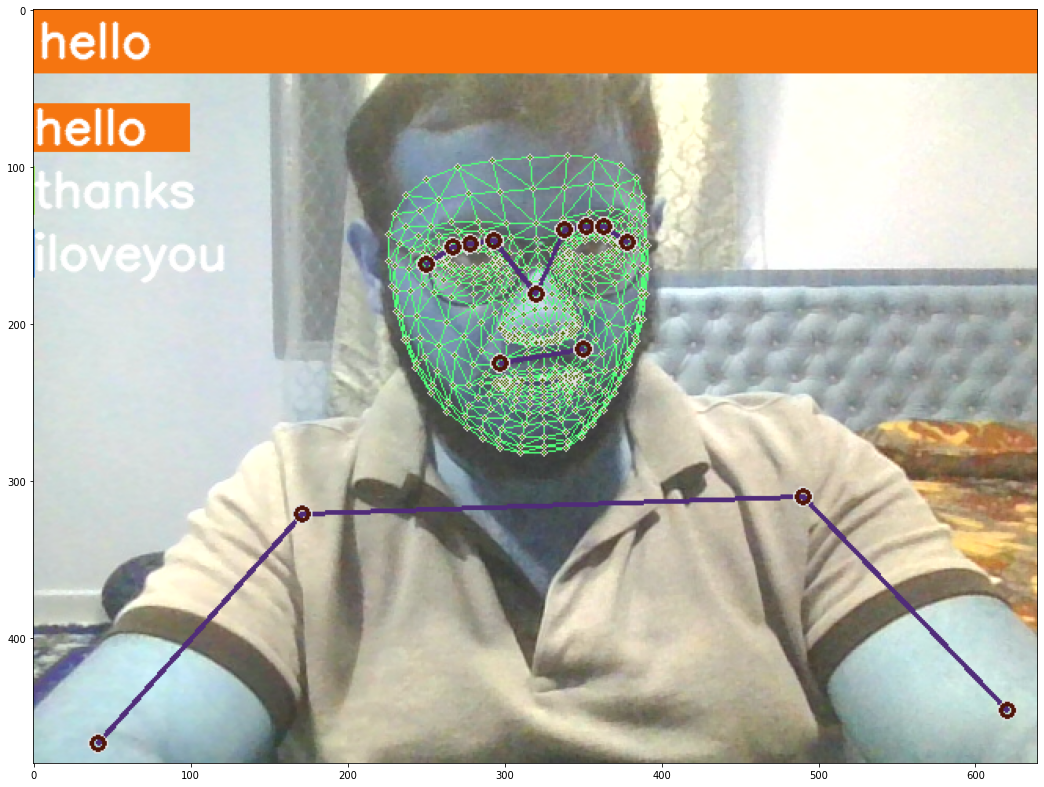

In [92]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [83]:
sequence.reverse()

In [84]:
len(sequence)

30

In [88]:
sequence.append('def')

In [86]:
sequence.reverse()

In [87]:
sequence[-30:]

[array([ 0.47982216,  0.47967729, -1.47364783, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.47693914,  0.48165864, -1.38066745, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.47696766,  0.48447222, -1.45114183, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.47945064,  0.48426124, -1.42829275, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.48388442,  0.4736166 , -1.45543289, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.49391538,  0.45880395, -1.47285795, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.50659359,  0.39409015, -1.00385022, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.51637697,  0.36240122, -0.96176434, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.52224821,  0.35111627, -1.00656569, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.52583122,  0.34400022, -0.84959537, ...,  0.        ,
         0.        ,  0.  

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions=[]
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [89]:
res[np.argmax(res)] > threshold

True

In [94]:
#(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0],axis=0))